In [1]:
import SLP_implementation
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import ast
from scipy.interpolate import make_interp_spline
from scipy.fft import fft,ifft
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('penguins.csv')
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,male,3750
1,Adelie,39.5,17.4,186,female,3800
2,Adelie,40.3,18.0,195,female,3250
3,Adelie,39.6,17.7,186,female,3500
4,Adelie,36.7,19.3,193,female,3450


In [3]:
np.sum(df.duplicated())

0

In [4]:
df.dtypes


species               object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm      int64
gender                object
body_mass_g            int64
dtype: object

In [5]:
np.sum(df.isna())

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
gender               6
body_mass_g          0
dtype: int64

In [6]:
df.species.value_counts()

Gentoo       50
Adelie       50
Chinstrap    50
Name: species, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
species_enc = LabelEncoder()
df['species'] = species_enc.fit_transform( df[['species']] )
print(df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int32


In [8]:
df['gender'] = [1 if kind == 'male' else 0 for kind in df['gender']]
print(df['gender'])

0      1
1      0
2      0
3      0
4      0
      ..
145    1
146    0
147    1
148    1
149    0
Name: gender, Length: 150, dtype: int64


In [9]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,0,39.1,18.7,181,1,3750
1,0,39.5,17.4,186,0,3800
2,0,40.3,18.0,195,0,3250
3,0,39.6,17.7,186,0,3500
4,0,36.7,19.3,193,0,3450


Plotting X1,X2 :

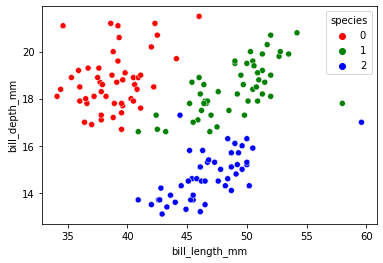

In [61]:
import seaborn as sns
sns.scatterplot(x= 'bill_length_mm', y= 'bill_depth_mm', data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
plt.show()

Plotting X1,X3 :

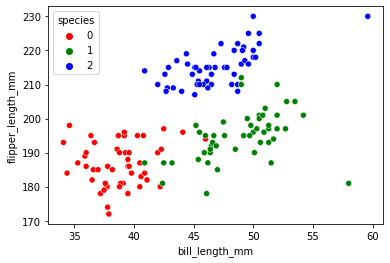

In [62]:
sns.scatterplot(x= 'bill_length_mm', y= 'flipper_length_mm', data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
plt.show()

Plotting X4 :

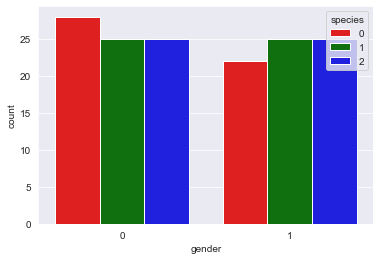

In [78]:
sns.countplot(x= 'gender', data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
sns.set_style("darkgrid")
plt.show()

Plotting X1,X5 :

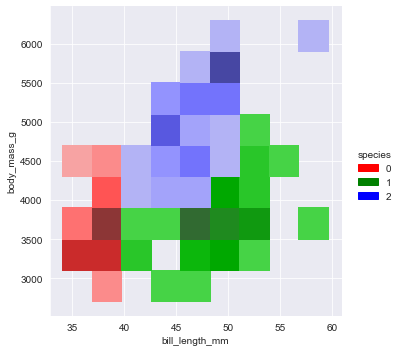

In [80]:
sns.displot(x= 'bill_length_mm',y='body_mass_g' ,data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
sns.set_style("darkgrid")
plt.show()

Plotting X2,X3 :

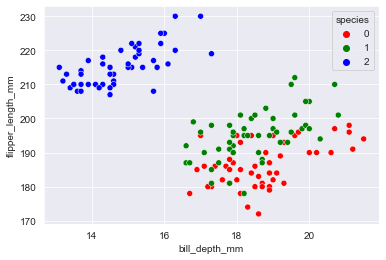

In [81]:
sns.scatterplot(x= 'bill_depth_mm', y= 'flipper_length_mm', data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
plt.show()

Plotting X2,X5 :

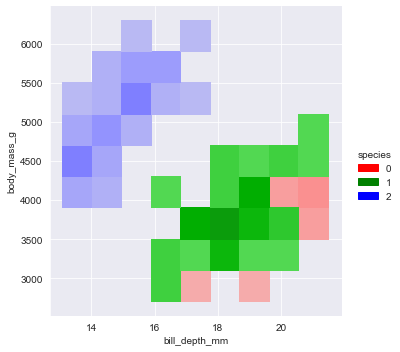

In [92]:
sns.displot(x= 'bill_depth_mm', y= 'body_mass_g', data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
plt.show()

Plotting X3,X5 :

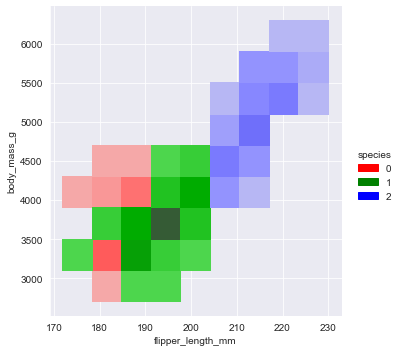

In [90]:
sns.displot(x= 'flipper_length_mm', y= 'body_mass_g', data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
plt.show()

### conclusion :
#### ......."X1 and X2 are the best features to split on linearly "....

### Dividing the dataframe into 3 separate classes

In [21]:
df_Adelie = df[df['species'] == 0]
df_Gentoo = df[df['species'] == 1]
df_Chinstrap = df[df['species'] == 2]

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
50,2,46.1,13.2,211,0,4500
51,2,50.0,16.3,230,1,5700
52,2,48.7,14.1,210,0,4450
53,2,50.0,15.2,218,1,5700
54,2,47.6,14.5,215,1,5400


### Selecting 2 classes (C1,C2) || (C1,C3) || (C2,C3) :

#### 1. (C1,C2)

In [24]:
df_Adelie_Gentoo = df_Adelie.append(df_Gentoo,ignore_index=True,verify_integrity=True,sort=True)
print(df_Adelie_Gentoo['species'].size)
print(df_Adelie_Gentoo['species'].values)
X01 = df_Adelie_Gentoo['bill_length_mm']
X11 = df_Adelie_Gentoo['bill_depth_mm']
X21 = df_Adelie_Gentoo['flipper_length_mm']
X31 = df_Adelie_Gentoo['gender']
X41 = df_Adelie_Gentoo['body_mass_g']

100
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
'''
X1 = df_Adelie_Gentoo.loc[:, df.columns != 'species']
Y1 = df_Adelie_Gentoo['species']
X1Train, X1Test, Y1Train, Y1Test = train_test_split(X1, Y1, test_size=0.3, shuffle=True, random_state=8)
'''

#### 2. (C1,C3)

In [26]:
df_Adelie_Chinstrap = df_Adelie.append(df_Chinstrap,ignore_index=True,verify_integrity=True,sort=True)
print(df_Adelie_Chinstrap.shape)
print(df_Adelie_Chinstrap['species'].values)
X02 = df_Adelie_Chinstrap['bill_length_mm']
X12 = df_Adelie_Chinstrap['bill_depth_mm']
X22 = df_Adelie_Chinstrap['flipper_length_mm']
X32 = df_Adelie_Chinstrap['gender']
X42 = df_Adelie_Chinstrap['body_mass_g']

(100, 6)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


#### 3. (C2,C3)

In [27]:
df_Gentoo_Chinstrap = df_Gentoo.append(df_Chinstrap,ignore_index=True,verify_integrity=True,sort=True)
print(df_Gentoo_Chinstrap.shape)
print(df_Gentoo_Chinstrap['species'].values)
X03 = df_Gentoo_Chinstrap['bill_length_mm']
X13 = df_Gentoo_Chinstrap['bill_depth_mm']
X23 = df_Gentoo_Chinstrap['flipper_length_mm']
X33 = df_Gentoo_Chinstrap['gender']
X43 = df_Gentoo_Chinstrap['body_mass_g']

(100, 6)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
X = df.loc[:, df.columns != 'species']
Y = df['species']
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=8)

In [46]:
print(X.bill_depth_mm)

0      18.7
1      17.4
2      18.0
3      17.7
4      19.3
       ... 
145    18.5
146    17.9
147    19.6
148    18.7
149    17.3
Name: bill_depth_mm, Length: 150, dtype: float64


In [12]:
ss=StandardScaler()
scaler = ss.fit(XTrain)
trainX_scaled = scaler.transform(XTrain)
testX_scaled = scaler.transform(XTest)

In [13]:
prcptrn = SLP_implementation.CustomPerceptron(n_iterations=100)

In [14]:
prcptrn.fit(trainX_scaled, YTrain)

In [15]:
prcptrn.score(testX_scaled, YTest), prcptrn.score(trainX_scaled, YTrain)

(0.5333333333333333, 0.5619047619047619)

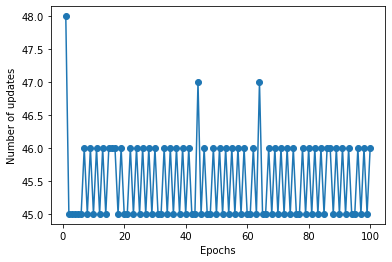

In [16]:
plt.plot(range(1, len(prcptrn.errors_) + 1), prcptrn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [17]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(trainX_scaled, YTrain)

y_pred = ppn.predict(testX_scaled)

print('Accuracy: %.3f' % accuracy_score(YTest, y_pred))
print('Accuracy: %.3f' % ppn.score(testX_scaled, YTest))

Accuracy: 0.933
Accuracy: 0.933
